In [1]:
# Imporando bilbiotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Criando o caminho do Arquivo
data_path = r'C:\Users\guilh\OneDrive\Área de Trabalho\Coding\Portif_git\Car_sales\Datasets\dbr.csv'
db = pd.read_csv(data_path)
db.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,1,1,1,1,88.6,168.8,64.1,48.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,1,1,1,1,88.6,168.8,64.1,48.8,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,2,1,1,94.5,171.2,65.5,52.4,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,2,3,2,1,99.8,176.6,66.2,54.3,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,2,3,3,1,99.4,176.6,66.4,54.3,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
# Definindo as variáveis independentes (X) e a variável alvo (y)
X = db.drop('price', axis=1)  # Todas as variáveis exceto 'price'
y = db['price']  # Variável alvo 'price'


In [3]:
# Importando uma biblioteca de padronização.
from sklearn.preprocessing import StandardScaler

# A padronização envolve subtrair a média e dividir pelo desvio padrão de cada variável, o que coloca as variáveis na mesma escala. Ou seja é o valor Z.
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X) # Ela ajuda a garantir que as variáveis tenham uma escala comum, o que pode melhorar o desempenho do modelo.

In [4]:
# importando os módulos para execução da regressão.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=91)

# Criando e treinando o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse.round(3))
print('R-squared (R²):', r2.round(3))

# Adicionando uma constante para o modelo
X_train_with_const = sm.add_constant(X_train)

# Criando e treinando o modelo usando statsmodels
model_sm = sm.OLS(y_train, X_train_with_const).fit()

# Obtendo o sumário do modelo
summary = model_sm.summary()
print(summary)


Mean Squared Error (MSE): 9096665.491
R-squared (R²): 0.87
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     54.79
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           4.85e-58
Time:                        11:25:02   Log-Likelihood:                -1518.9
No. Observations:                 164   AIC:                             3084.
Df Residuals:                     141   BIC:                             3155.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [6]:
# tirando a raiz quadrada do erro médio quadrado faz com que o o valor se torne simbólicamente interpretável.
raiz= np.sqrt(mse)
raiz.round(3)

3016.068

O modelo obteve um bom desempenho, uma vez que o valor de R² indica que mais de 87% da variabilidade na variável de preço está sendo explicada ou correlacionada com as demais variáveis. O erro, que geralmente está por volta de 3000, depende da escala da variável alvo e parece estar dentro de um valor plausível.

In [5]:
# Aqui podemos verificar o coeficiente gerado pela regressão para cada parâmetro.
print("Coefficient:", model.coef_.round(3))

Coefficient: [ 1429.803  1285.41     48.527  -475.164  -711.517  1203.288   326.545
   696.975    16.51    492.594   613.71    399.309  1671.443  6002.424
  -826.371  -748.317  -739.947  -649.14   -652.232  1220.82  -1995.568
  2013.415]


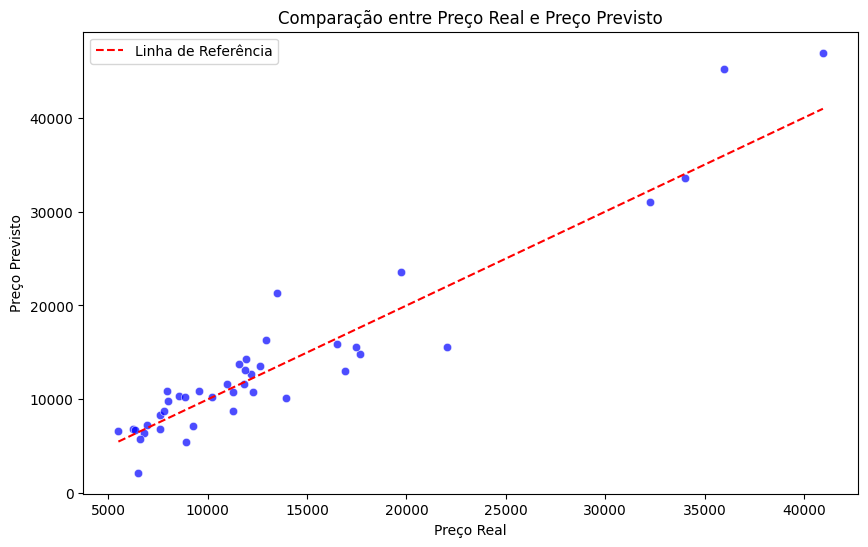

In [6]:
# Plotando uma gráfico para comparar o modelo.

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)  # Scatter plot para previsões
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Linha de Referência')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Comparação entre Preço Real e Preço Previsto')
plt.legend()
plt.show()


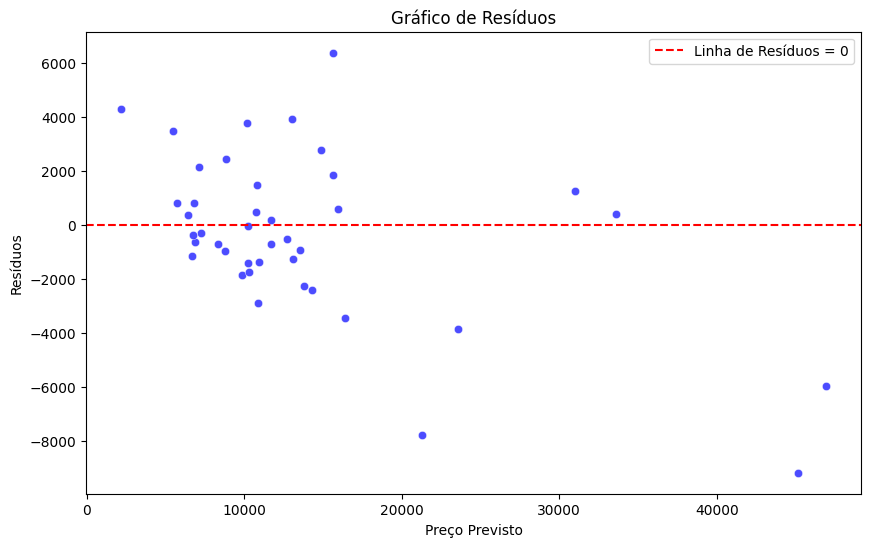

In [7]:
# Calculando os resíduos
residuals = y_test - y_pred

# Criando o gráfico de dispersão dos resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Linha de Resíduos = 0')
plt.xlabel('Preço Previsto')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.legend()
plt.show()

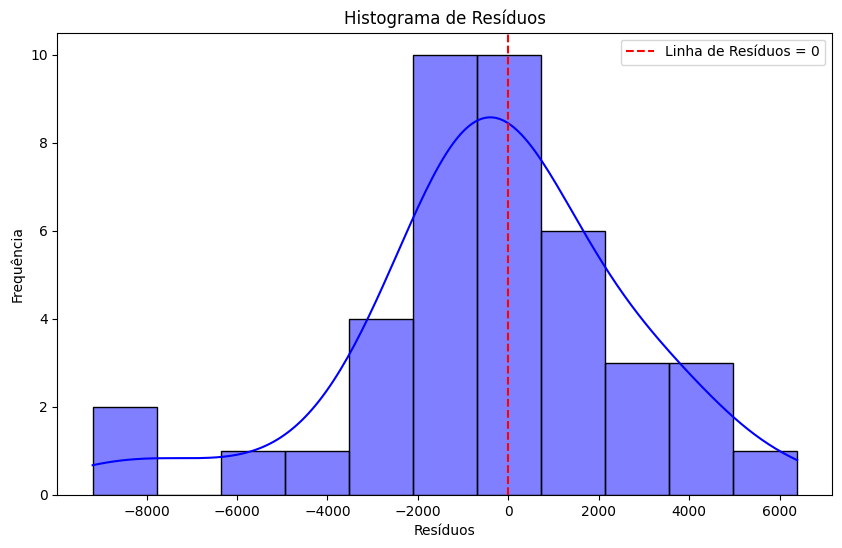

In [7]:
# Calculando os resíduos
residuals = y_test - y_pred

# Criando o histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Linha de Resíduos = 0')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.legend()
plt.show()


In [8]:
print("Intercepto:", model.intercept_.round(3))

Intercepto: 13346.828


Os resíduos gerados na regressão apresentam uma curva aproximadamente normal, o que é o comportamento esperado, e isso sugere uma boa performance do modelo. O valor do intercepto também se aproxima do valor esperado. A seguir, criei outro modelo, eliminando variáveis com base nos P-valores do primeiro modelo.

In [8]:
# Definindo as variáveis independentes (X) e a variável alvo (y)
X_2 = db[['drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 
       'horsepower', 'citympg', 'highwaympg']]  # Todas as variáveis de impacto segundo a matriz de correlação
y = db['price']  # Variável alvo 'price'

# Realizando  a padronização em termos do desvio padrão.
scaler = StandardScaler()
scaler.fit(X_2)
x_scaled_2 = scaler.transform(X_2)

# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(x_scaled_2, y, test_size=0.2, random_state=91)

# Criando e treinando o modelo de regressão linear múltipla
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões
y_pred_2 = modelo.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)

print('Mean Squared Error (MSE):', mse.round(3))
print('R-squared (R²):', r2.round(3))

# Adicionando uma constante para o modelo
X_train_with_const = sm.add_constant(X_train)

# Criando e treinando o modelo usando statsmodels
modelo_sm = sm.OLS(y_train, X_train_with_const).fit()

# Obtendo o sumário do modelo
summary = modelo_sm.summary()
print(summary)


Mean Squared Error (MSE): 7796021.596
R-squared (R²): 0.888
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     73.66
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           8.80e-57
Time:                        11:51:00   Log-Likelihood:                -1546.1
No. Observations:                 164   AIC:                             3118.
Df Residuals:                     151   BIC:                             3158.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

Em comparação ao primeiro modelo, é possível observar uma redução do valor absoluto do MSE, o que é um indicador de melhor desempenho. O valor de R² também obteve melhor desempenho, aproximando-se de 1.

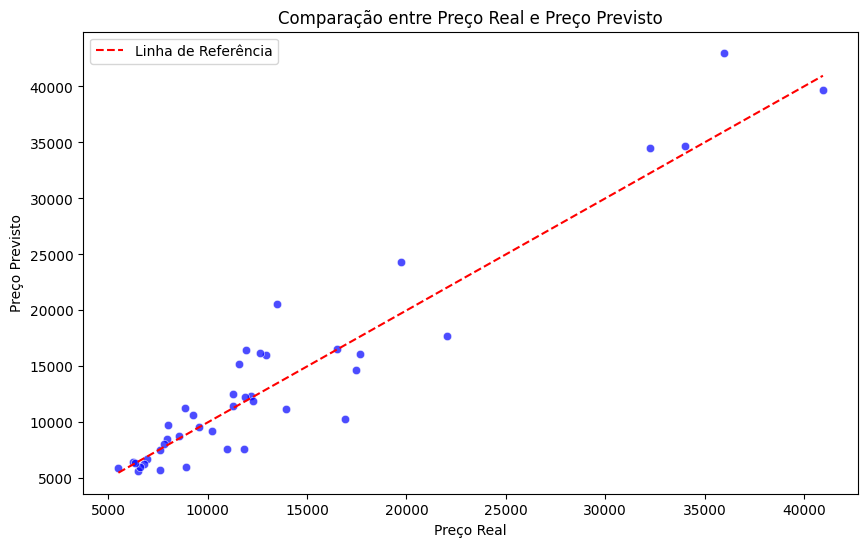

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y= y_pred_2, color='blue', alpha=0.7)  # Scatter plot para previsões
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Linha de Referência')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Comparação entre Preço Real e Preço Previsto')
plt.legend()
plt.show()


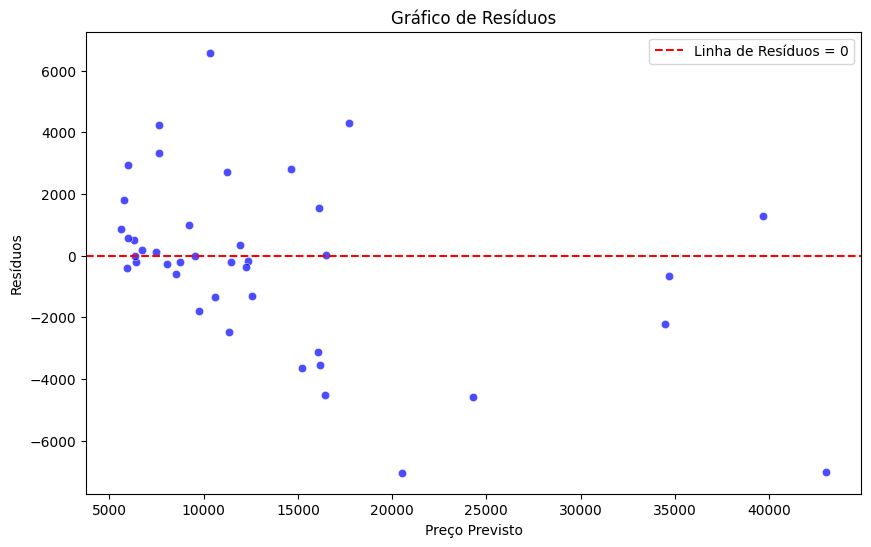

In [10]:
# Calculando os resíduos
residuo = y_test - y_pred_2

# Criando o gráfico de dispersão dos resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_2, y=residuo, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Linha de Resíduos = 0')
plt.xlabel('Preço Previsto')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.legend()
plt.show()


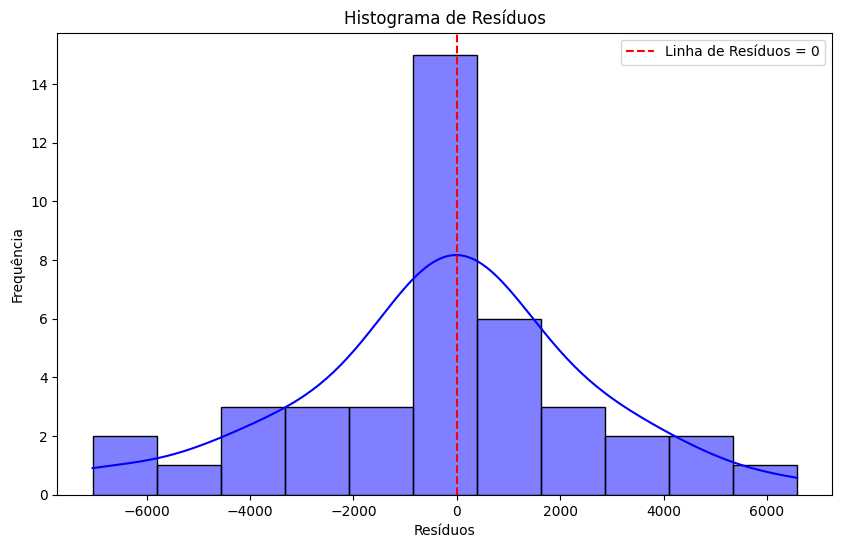

In [11]:
# Criando o histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuo, kde=True, color='blue')
plt.axvline(x=0, color='red', linestyle='--', label='Linha de Resíduos = 0')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.legend()
plt.show()


In [12]:
print("Coefficient:", modelo.coef_.round(3))

Coefficient: [-579.433 1652.88   464.997 -511.203 1669.651 1834.192 3528.448 -217.918
 -887.9   1216.16    -7.12    83.782]


In [13]:
print("Intercepto:", modelo.intercept_.round(3))

Intercepto: 13328.285


Embora o incremento em R² e a redução do MSE possam não ter sido significativos, o gráfico de resíduos mostra uma melhor aproximação com a distribuição normal, indicando que o modelo alternativo, que utiliza menos variáveis, de fato apresenta um melhor desempenho em comparação com o primeiro modelo, que utiliza todas as variáveis. A baixo segue uma tabela com algumas previsões e estatísticas.

In [13]:
# Fazendo previsões no conjunto de teste
y_pred_2 = modelo.predict(X_test)

# Criando o DataFrame pf_df
pf_df = pd.DataFrame()
pf_df['Preco'] = y_test.values  # Convertendo para array para evitar o erro de comprimento
pf_df['Previsao'] = y_pred_2.round(2)
pf_df['Residuo'] = (pf_df['Preco'] - pf_df['Previsao']).round(2)
pf_df['Diferenca_em_%'] = (np.absolute((pf_df['Preco'] - pf_df['Previsao']) / pf_df['Preco'] * 100)).round(2)

# Exibindo o DataFrame pf_df
print(pf_df.head(10))


     Preco  Previsao  Residuo  Diferenca_em_%
0  12170.0  12352.78  -182.78            1.50
1  22018.0  17714.80  4303.20           19.54
2   7957.0   8539.85  -582.85            7.32
3   6479.0   5623.89   855.11           13.20
4   7603.0   5786.42  1816.58           23.89
5   9279.0  10625.14 -1346.14           14.51
6  12940.0  16051.95 -3111.95           24.05
7  12629.0  16166.67 -3537.67           28.01
8  13950.0  11229.48  2720.52           19.50
9   6229.0   6430.68  -201.68            3.24


In [15]:
pf_df.describe().round(2)

,Preco,Previsao,Residuo,Diferenca_em_%
count,41.00,41.00,41.00,41.00
mean,13430.74,13688.61,-257.87,14.83
std,8455.18,9260.05,2814.74,13.39
min,5499.00,5623.89,-7044.68,0.02
25%,7957.00,7621.58,-1346.14,3.14
50%,11248.00,11229.48,-182.78,9.78
75%,13950.00,16128.19,997.57,23.89
max,40960.00,43013.69,6584.21,52.19
